# Logistic Regression: Practice Assignment

In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score

In [2]:
# read in the dataframe
df = pd.merge(pd.read_csv('../data/waterpumps/train_features.csv'), 
                 pd.read_csv('../data/waterpumps/train_labels.csv'))

df.shape

(59400, 41)

## Prepare the target variable

In [3]:
# check out the target. 


functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [4]:
# make the target binary (for simplicity's sake)


1    32259
0    27141
Name: functional, dtype: int64

In [5]:
# Establish the target variable


(59400,)


## Prepare the features

In [6]:
# keep only a few variables of interest to us
vars = ['latitude', 'longitude', 'quantity', 'gps_height',
       'construction_year', 'population', 
       'waterpoint_type', 'amount_tsh']


(59400, 8)

In [7]:
# Check for missing data


latitude             0
longitude            0
quantity             0
gps_height           0
construction_year    0
dtype: int64

In [8]:
# take a look


,latitude,longitude,quantity,gps_height,construction_year,population,waterpoint_type,amount_tsh
0,-9.856322,34.938093,enough,1390,1999,109,communal standpipe,6000.0
1,-2.147466,34.698766,insufficient,1399,2010,280,communal standpipe,0.0
2,-3.821329,37.460664,enough,686,2009,250,communal standpipe multiple,25.0
3,-11.155298,38.486161,dry,263,1986,58,communal standpipe multiple,0.0
4,-1.825359,31.130847,seasonal,0,0,0,communal standpipe,0.0


In [9]:
# check out the continuous variables


,latitude,longitude,gps_height,construction_year,population,amount_tsh
count,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,-5.706033e+00,34.077427,668.297239,1300.652475,179.909983,317.650385
std,2.946019e+00,6.567432,693.116350,951.620547,471.482176,2997.574558
min,-1.164944e+01,0.000000,-90.000000,0.000000,0.000000,0.000000
25%,-8.540621e+00,33.090347,0.000000,0.000000,0.000000,0.000000
50%,-5.021597e+00,34.908743,369.000000,1986.000000,25.000000,0.000000
75%,-3.326156e+00,37.178387,1319.250000,2004.000000,215.000000,20.000000
max,-2.000000e-08,40.345193,2770.000000,2013.000000,30500.000000,350000.000000


In [10]:
# check out the categorical variables


enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64


communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64


In [11]:
# convert the categorical variable to dummies via one-hot encoding


,quantity_dry,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown
0,0,1,0,0,0
1,0,0,1,0,0
2,0,1,0,0,0
3,1,0,0,0,0
4,0,0,0,1,0


In [12]:
# convert the categorical variable to dummies via one-hot encoding


,waterpoint_cattle trough,waterpoint_communal standpipe,waterpoint_communal standpipe multiple,waterpoint_dam,waterpoint_hand pump,waterpoint_improved spring,waterpoint_other
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0


In [13]:
# use pd.concat to join the new columns with your original dataframe


In [14]:
# now drop the original columns (you don't need them anymore)


(59400, 18)

In [15]:
# head

,latitude,longitude,gps_height,construction_year,population,amount_tsh,quantity_dry,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown,waterpoint_cattle trough,waterpoint_communal standpipe,waterpoint_communal standpipe multiple,waterpoint_dam,waterpoint_hand pump,waterpoint_improved spring,waterpoint_other
0,-9.856322,34.938093,1390,1999,109,6000.0,0,1,0,0,0,0,1,0,0,0,0,0
1,-2.147466,34.698766,1399,2010,280,0.0,0,0,1,0,0,0,1,0,0,0,0,0


## Prepare for Modeling

In [16]:
# Rename the matrix of features as X


In [17]:
# split your data into training and testing


In [18]:
# instantiate the scaler

In [19]:
# fit the scaler on the training data, then transform it 

In [20]:
# confirm the transformation: mean of zero & std of 1

0.0
1.0


In [21]:
# compare one row of the scaled training dataset to the original dataset
# this simply demonstrates "before" and "after" scaling.

latitude                                    -9.856322
longitude                                   34.938093
gps_height                                1390.000000
construction_year                         1999.000000
population                                 109.000000
amount_tsh                                6000.000000
quantity_dry                                 0.000000
quantity_enough                              1.000000
quantity_insufficient                        0.000000
quantity_seasonal                            0.000000
quantity_unknown                             0.000000
waterpoint_cattle trough                     0.000000
waterpoint_communal standpipe                1.000000
waterpoint_communal standpipe multiple       0.000000
waterpoint_dam                               0.000000
waterpoint_hand pump                         0.000000
waterpoint_improved spring                   0.000000
waterpoint_other                             0.000000
Name: 0, dtype: float64
[ 0.

In [22]:
# transform the testing data using the fitted scaler. IMPORTANT: Do not fit on the testing data!


### prepare the Comparison Dictionary

In [23]:
# Create a dictionary to store our modeling results for comparison. Enter some fake data.
results_comparison={'model': ['logistic','knn', 'decision tree', 'random forest', 'boosting'],
                   'accuracy': [51,61,71,81,91],
                   'precision': [50,60,70,80,90],
                   'recall': [49,59,69,79,89],
                   'roc-auc': [48,58,68,78,88],
                   'f1-score': [47,57,67,77,87]
                   }


,accuracy,precision,recall,roc-auc,f1-score
model,,,,,
logistic,51,50,49,48,47
knn,61,60,59,58,57
decision tree,71,70,69,68,67
random forest,81,80,79,78,77
boosting,91,90,89,88,87


<AxesSubplot:xlabel='model'>

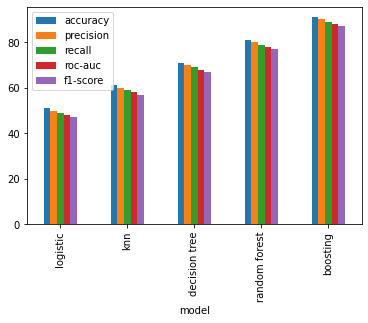

In [24]:
# Plot those results

## Model 1. Logistic Regression

In [25]:
# instantiate the model (note we increase max-iter here; default is 100)

In [26]:
# fit your model on the training dataset

LogisticRegression(max_iter=1000)

In [27]:
# predict on the testing dataset

preds [1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
truth [1, 0, 1, 1, 1, 0, 0, 0, 0, 0]


In [28]:
# calculate the accuracy of your predictions

accuracy 0.7175084175084175
precision 0.906901688182721
recall 0.6795646916565901
roc-auc 0.7482966176018984
f1-score 0.7769447546126442


In [29]:
# update our dictionary of results with those scores!

,accuracy,precision,recall,roc-auc,f1-score
model,,,,,
logistic,0.72,0.91,0.68,0.75,0.78
knn,61.00,60.00,59.00,58.00,57.00
decision tree,71.00,70.00,69.00,68.00,67.00
random forest,81.00,80.00,79.00,78.00,77.00
boosting,91.00,90.00,89.00,88.00,87.00


## Model 2. KNN

In [30]:
# instantiate the model

In [31]:
# fit with data

KNeighborsClassifier()

In [32]:
# predict on the testing dataset

preds [1, 0, 1, 1, 1, 0, 0, 0, 1, 0]
truth [1, 0, 1, 1, 1, 0, 0, 0, 0, 0]


In [33]:
# calculate the accuracy of your predictions

accuracy 0.7783164983164983
precision 0.8318023833167825
recall 0.7757582773790229
roc-auc 0.7788160350191959
f1-score 0.802803402420031


In [34]:
# update our dictionary of results with those scores!

,accuracy,precision,recall,roc-auc,f1-score
model,,,,,
logistic,0.72,0.91,0.68,0.75,0.78
knn,0.78,0.83,0.78,0.78,0.80
decision tree,71.00,70.00,69.00,68.00,67.00
random forest,81.00,80.00,79.00,78.00,77.00
boosting,91.00,90.00,89.00,88.00,87.00


## Decision Tree

In [35]:
# instantiate the model

In [36]:
# fit with data

DecisionTreeClassifier()

In [37]:
# predict on the testing dataset

preds [1, 0, 1, 1, 0, 0, 0, 0, 1, 0]
truth [1, 0, 1, 1, 1, 0, 0, 0, 0, 0]


In [38]:
# calculate the accuracy of your predictions

accuracy 0.7712457912457913
precision 0.7935700099304865
recall 0.7866371354743448
roc-auc 0.7696386629327696
f1-score 0.7900883643329418


In [39]:
# update our dictionary of results with those scores!

,accuracy,precision,recall,roc-auc,f1-score
model,,,,,
logistic,0.72,0.91,0.68,0.75,0.78
knn,0.78,0.83,0.78,0.78,0.80
decision tree,0.77,0.79,0.79,0.77,0.79
random forest,81.00,80.00,79.00,78.00,77.00
boosting,91.00,90.00,89.00,88.00,87.00


## Model 2. Random Forest

In [40]:
# instantiate the model

In [41]:
# fit with data

RandomForestClassifier(random_state=42)

In [42]:
# predict on the testing dataset

preds [1, 0, 1, 1, 1, 0, 0, 0, 0, 0]
truth [1, 0, 1, 1, 1, 0, 0, 0, 0, 0]


In [43]:
# calculate the accuracy of your predictions

accuracy 0.8101683501683502
precision 0.8582423038728898
recall 0.804795716447445
roc-auc 0.8111692274520338
f1-score 0.8306601790112332


In [44]:
# update our dictionary of results with those scores!

,accuracy,precision,recall,roc-auc,f1-score
model,,,,,
logistic,0.72,0.91,0.68,0.75,0.78
knn,0.78,0.83,0.78,0.78,0.80
decision tree,0.77,0.79,0.79,0.77,0.79
random forest,0.81,0.86,0.80,0.81,0.83
boosting,91.00,90.00,89.00,88.00,87.00


## Model 4. Boosting

In [45]:
# instantiate the model

In [46]:
# fit with data

AdaBoostClassifier(n_estimators=100, random_state=42)

In [47]:
# predict on the testing dataset

preds [1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
truth [1, 0, 1, 1, 1, 0, 0, 0, 0, 0]


In [48]:
# calculate the accuracy of your predictions

accuracy 0.7383164983164984
precision 0.8675521350546177
recall 0.7125815660685155
roc-auc 0.750479596996971
f1-score 0.7824675324675325


In [49]:
# update our dictionary of results with those scores!

,accuracy,precision,recall,roc-auc,f1-score
model,,,,,
logistic,0.72,0.91,0.68,0.75,0.78
knn,0.78,0.83,0.78,0.78,0.80
decision tree,0.77,0.79,0.79,0.77,0.79
random forest,0.81,0.86,0.80,0.81,0.83
boosting,0.74,0.87,0.71,0.75,0.78


## Compare your results

<AxesSubplot:xlabel='model'>

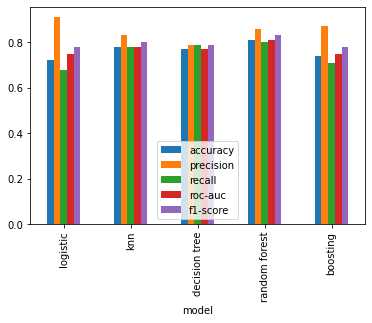

In [50]:
# Plot those results

In [53]:
# Build this with plotly so it looks nice & pretty.

# https://digitalsynopsis.com/design/minimal-web-color-palettes-combination-hex-code/
# colors0=[ '#F7DB4F',  '#A7226E',   '#F26B38', '#2F9599', '#EC2049']

Remember: While recall expresses the ability to find all relevant instances in a dataset, precision expresses the proportion of the data points our model says was relevant actually were relevant.  
 https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c

* Precision is a good measure to focus on when the cost of a False Positive is high. 
* Choose Recall when there is a high cost associated with a False Negative.
* Combine them (with ROC-AUC or F1 score) if both are important.

In the Water Pumps example:
* False **positive** : we accidentally flagged a pump as "functional" when it was actually broken, so we did not repair it. The town has no water.
* False **negative** : oops! we flagged a pump as "broken" when it was actually just fine, so we wasted our time & money by sending out a repair team unnecessarily.